In [36]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import sklearn 
import sklearn.mixture as mix 

Testing a small universe of the 10Y Treasury, an Oil ETF, and Tech ETF 

In [37]:
assetlist = [ 'IEF', 'GSG', 'IXN' ]
num_components = 10

Create the subset of assets.

In [38]:
m6 = pd.read_csv('./data/assets_m6.csv')
m6_subset = pd.DataFrame()

for sym in assetlist: 
    m6_subset[sym] = m6[m6['symbol'] == sym]['price'].values

1st-order differencing of the rolling average expectation for each asset. 

In [39]:
m6_subset = m6_subset.apply(np.log).rolling(30).mean().diff().dropna().reset_index().drop(columns='index')
print(m6_subset)

          IEF       GSG       IXN
0   -0.000979  0.003849 -0.003734
1   -0.000979  0.003340 -0.002569
2   -0.001112  0.005079 -0.002621
3   -0.000872  0.005236 -0.000903
4   -0.001051  0.006381 -0.001222
..        ...       ...       ...
164 -0.000614  0.004345  0.000273
165 -0.000165  0.003308  0.000619
166 -0.000793  0.001339 -0.000494
167  0.000102  0.001772  0.003074
168  0.000119  0.002854  0.004433

[169 rows x 3 columns]


Instantiate a non-parametric clustering model using the dirichlet process. 

In [40]:
dpgmm_model = mix.BayesianGaussianMixture(n_components=num_components, weight_concentration_prior_type='dirichlet_process').fit(m6_subset)

In [41]:
states = dpgmm_model.predict(m6_subset)
state_counts = np.zeros(num_components)

for M in states:
  state_counts[M] += 1 

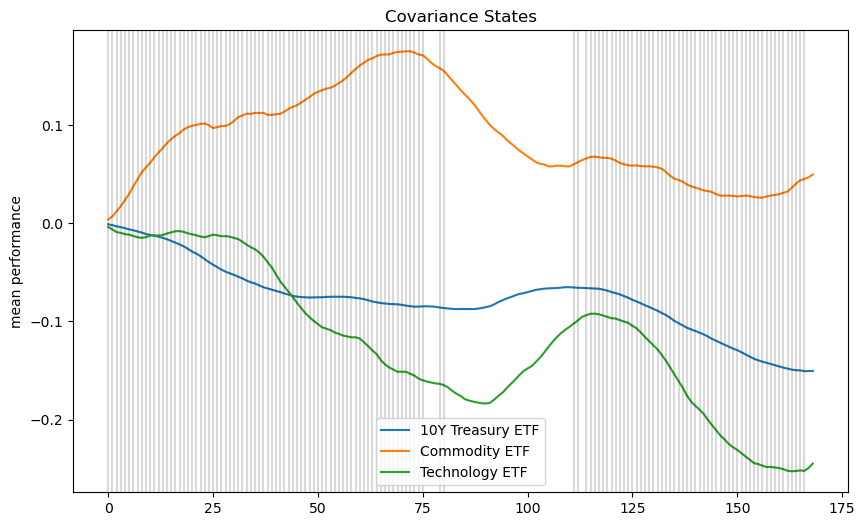

In [42]:
fig,ax = plt.subplots(figsize=(10, 6
                              ))

sns.lineplot(data=m6_subset['IEF'].cumsum(), ax=ax, label='10Y Treasury ETF')
sns.lineplot(data=m6_subset['GSG'].cumsum(), ax=ax, label='Commodity ETF')
sns.lineplot(data=m6_subset['IXN'].cumsum(), ax=ax, label='Technology ETF')

for M in range(len(states)): 
  if states[M] == np.argmax(state_counts):
    ax.axvline(M, color='black', alpha=0.15)

ax.set_title('Covariance States')
ax.set_ylabel('mean performance')
plt.show()

In [43]:
print(dpgmm_model.means_)

[[-0.00125824  0.00106067 -0.0023339 ]
 [-0.00089317  0.00029072 -0.00144867]
 [ 0.00070939 -0.00153874  0.00346219]
 [-0.00089285  0.00029112 -0.00144862]
 [-0.00016817 -0.00367947 -0.00146198]
 [-0.00089031  0.0002945  -0.00144849]
 [-0.00089031  0.0002945  -0.00144849]
 [-0.00089031  0.0002945  -0.00144849]
 [-0.00089031  0.0002945  -0.00144849]
 [-0.00089031  0.0002945  -0.00144849]]
